In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
diabetes=pd.read_csv('C:\\Users\PC\\Desktop\\diabetes.csv')


In [3]:
#reading the first 7 rows of the dataset
diabetes.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking if the dataset has any null values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#replacing the 1 and 0 in the outcome column with yes and no respectively
diabetes['Outcome'] = diabetes['Outcome'].replace({1: 'yes', 0: 'no'})

In [7]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,0,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,0,0,30.1,0.349,47,yes


In [8]:
#Provides a brief overview of a DataFrame. 
#This summary includes details about the index data type, column names, presence of non-null values, and memory usage.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
diabetes.describe()# to understand how data has been spread across the table.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Certain columns show a skewed distribution, meaning outliers have a notable impact on the mean. For 'Glucose' and 'Blood Pressure', which have normal distributions, we replace zero values with the mean. However, for 'SkinThickness', 'Insulin', and 'BMI' with skewed distributions, it's better to use the median since it's less influenced by outliers.

In [10]:
#replacing the 0 with either mean or median 
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())#normal distribution
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())#normal distribution
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median())#skewed distribution
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].median())#skewed distribution
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].median())#skewed distribution

In [11]:
diabetes['Age'].mean()

33.240885416666664

<Axes: xlabel='Pregnancies', ylabel='Density'>

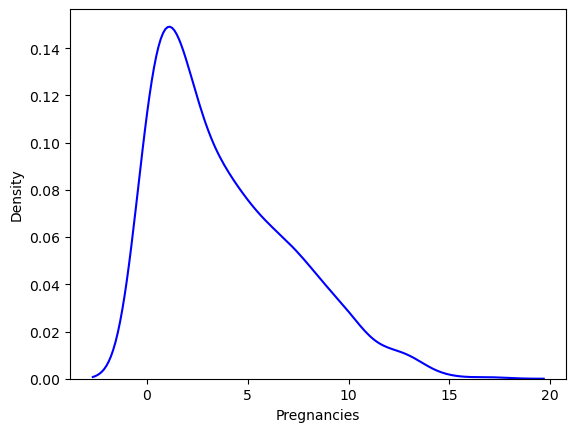

In [12]:
#distribution of the number of pregnancies among the individuals in the dataset?

sns.kdeplot(data=diabetes,x='Pregnancies',color='blue')

Text(0.5, 1.0, 'pregnancies distribution')

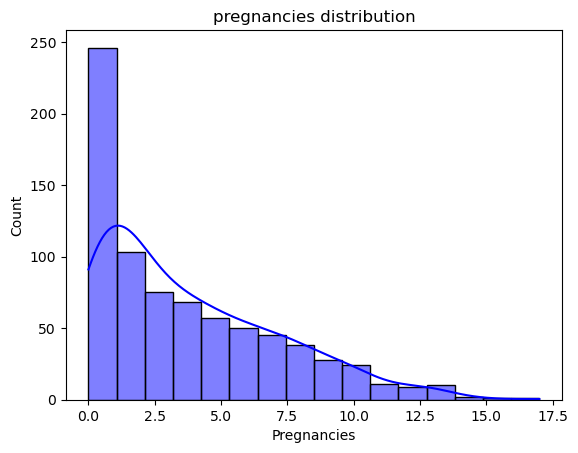

In [13]:
sns.histplot(data=diabetes,x='Pregnancies',kde=True,color='blue')
plt.title('pregnancies distribution')

Text(0.5, 1.0, 'glucose level distribution')

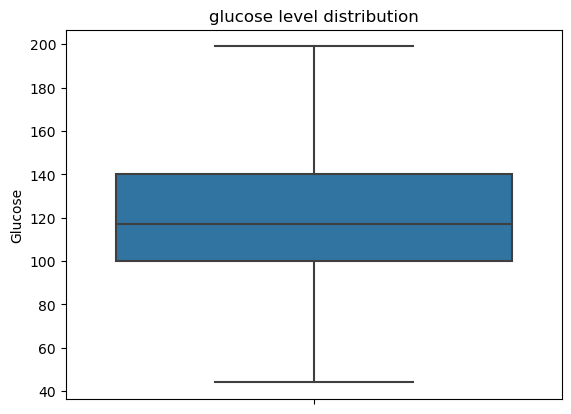

In [14]:
#distribution of glucose levels among the individuals
sns.boxplot(data=diabetes,y='Glucose')
plt.title('glucose level distribution')

<Axes: xlabel='Glucose', ylabel='Count'>

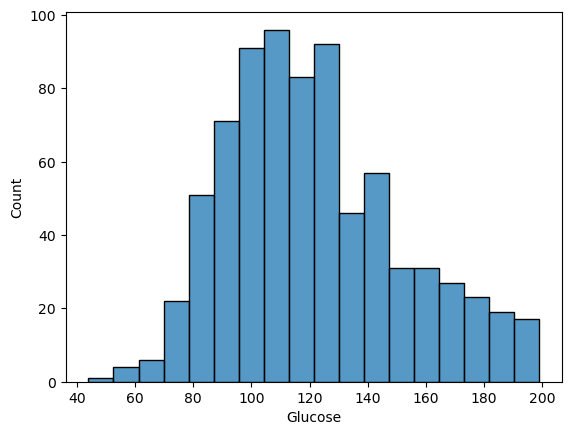

In [15]:
sns.histplot(data=diabetes,x='Glucose')

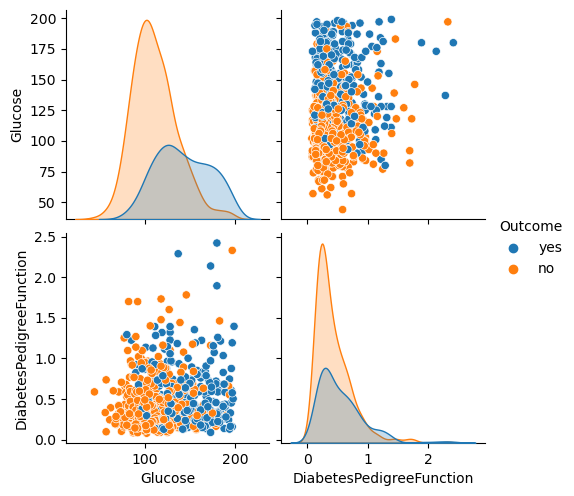

In [16]:
sns.pairplot(data=diabetes,vars=['Glucose', 'DiabetesPedigreeFunction'], hue='Outcome')
#In the diagonal graphs, we notice a clear distinction: 
#individuals with diabetes exhibit notably elevated levels of glucose, skin thickness, and diabetes pedigree function. 
#However, when we examine these three factors collectively, we don't observe a discernible pattern of correlation.
#In other words, there is no apparent trend indicating that as one of these variables increases, the others either increase or decrease in a consistent manner. 
#They appear to be relatively independent of each other in this context.


Text(0.5, 1.0, 'blood pressure distribution')

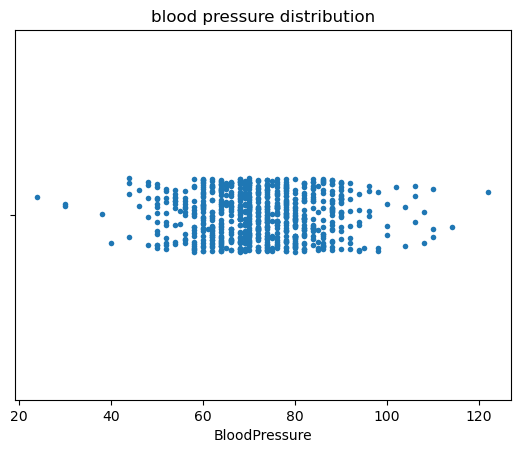

In [17]:
#How are blood pressure values distributed within the dataset
sns.stripplot(data=diabetes,x='BloodPressure',size=4,jitter=True)
plt.title('blood pressure distribution')

<Axes: xlabel='BMI', ylabel='Count'>

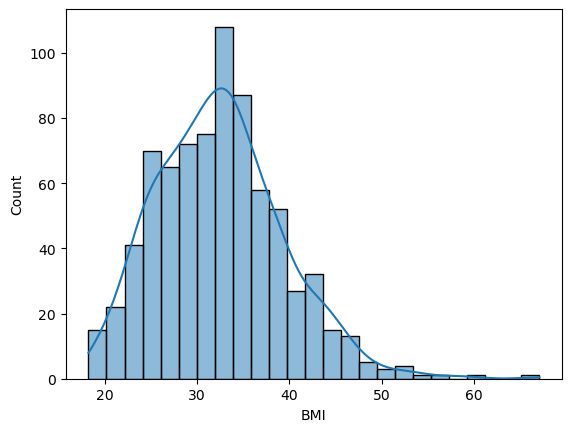

In [18]:
#What is the distribution of BMI (Body Mass Index) values
sns.histplot(data=diabetes,x='BMI',kde=True)

How does the Diabetes Pedigree Function vary among individuals

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

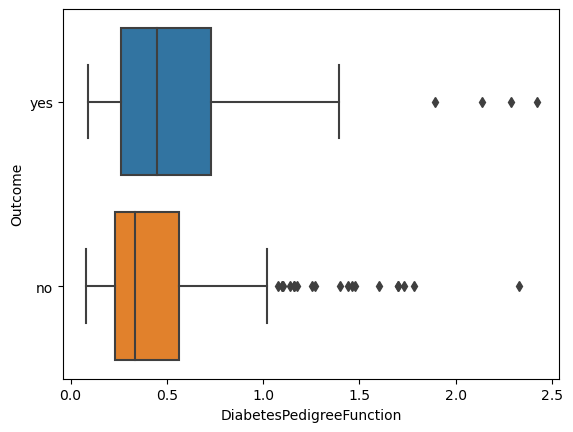

In [19]:
sns.boxplot(x='DiabetesPedigreeFunction', y='Outcome', data=diabetes)

What is the distribution of ages among the individuals

<Axes: xlabel='Age', ylabel='Outcome'>

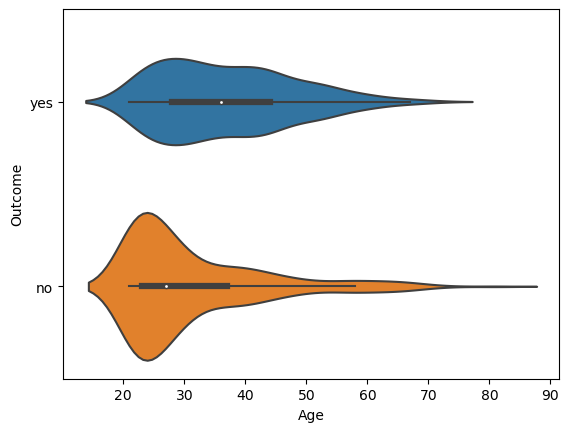

In [20]:
sns.violinplot(x='Age',y='Outcome',data=diabetes)

How many individuals have been diagnosed with diabetes (Outcome=1) vs.
those who haven't (Outcome=0)?

Text(0.5, 1.0, 'individuals with diabetes vs those without')

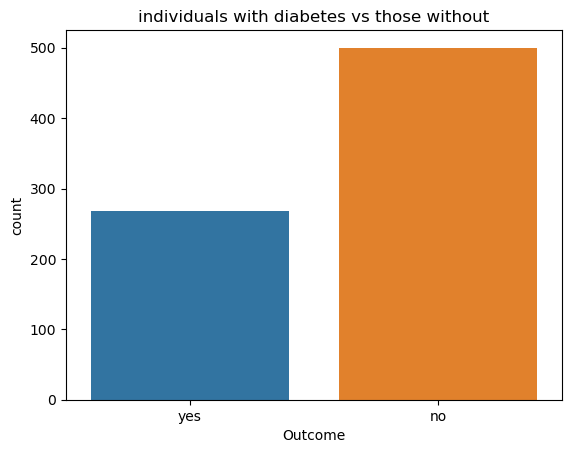

In [21]:
sns.countplot(x='Outcome', data=diabetes)
plt.title('individuals with diabetes vs those without')

 relationship between age and BMI using a scatterplot.

<Axes: xlabel='Age', ylabel='BMI'>

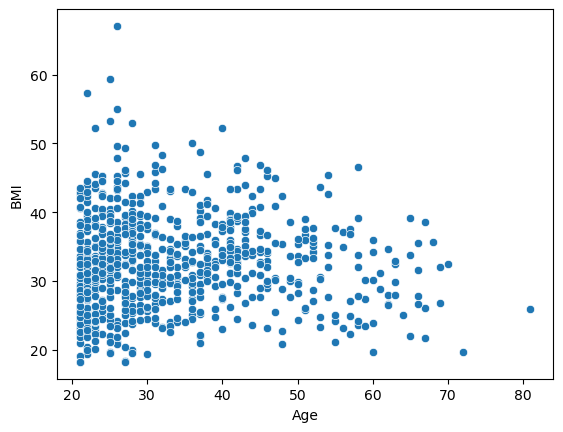

In [22]:
sns.scatterplot(data=diabetes,x='Age',y='BMI')

Text(0.5, 1.0, 'glucose and insulin distribution')

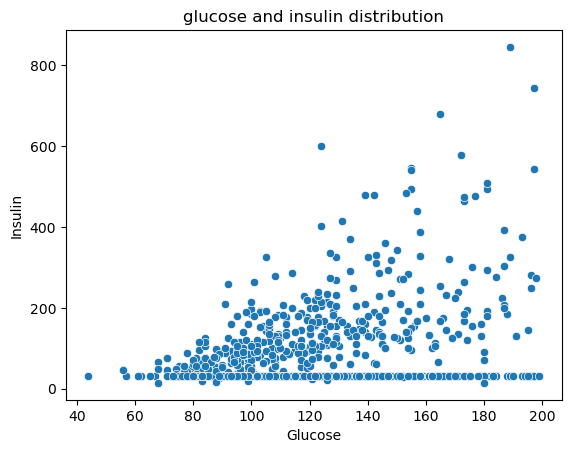

In [23]:
sns.scatterplot(x='Glucose',y='Insulin',data=diabetes)
plt.title('glucose and insulin distribution')
#If we disregard any potential errors in the data, it becomes evident that there is a noticeable rise in insulin levels as glucose levels increase.
#Based on this observation, we can infer that glucose and insulin are positively correlated, suggesting that an increase in glucose is associated with a corresponding increase in insulin.

distribution of pregnancies based
on diabetes outcome.

Text(0.5, 1.0, 'outcome vs pregnancies distribution')

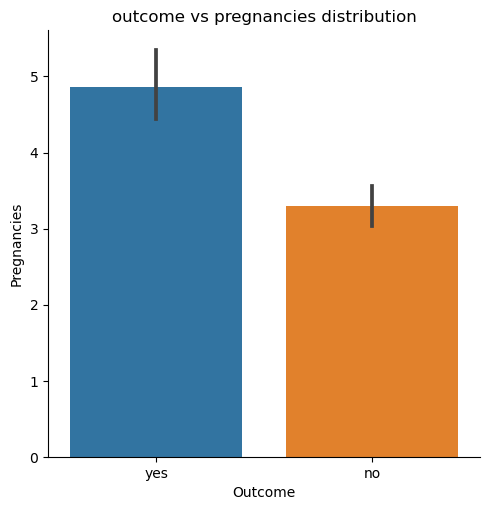

In [24]:
#sns.barplot(data=diabetes,X='Outcome',y='Pregnancies')
sns.catplot(x='Outcome', y='Pregnancies', data=diabetes, kind='bar')
plt.title('outcome vs pregnancies distribution')

In [25]:
corr_matrix = diabetes.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000


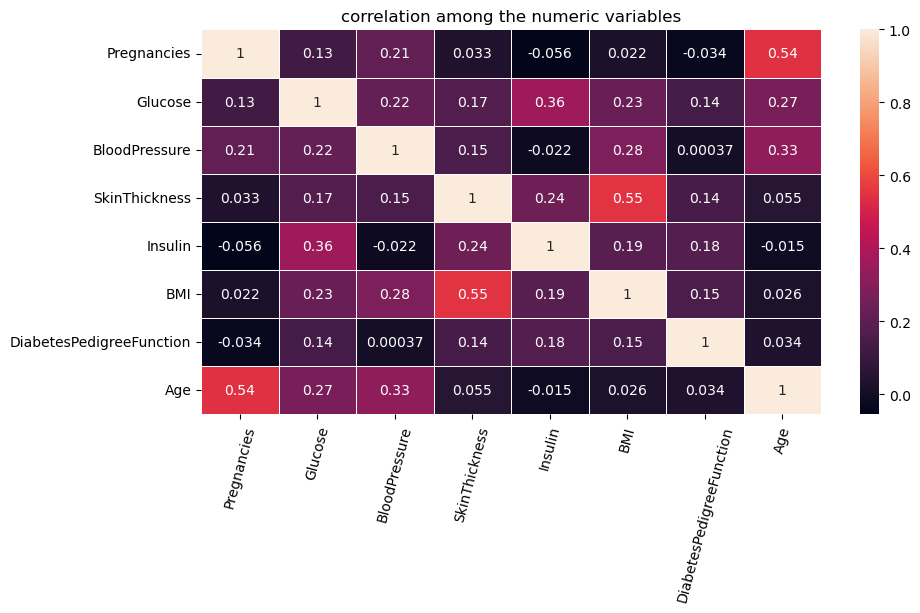

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot = True,linewidth=.5)
plt.title('correlation among the numeric variables')
plt.xticks(rotation=75)
plt.savefig('heatmap.png')
#There are notable strong positive correlations observed between the following pairs: 
#(1) Age and Pregnancies, 
#(2) BMI and Skin Thickness,
#(3) Insulin and Skin Thickness, 
#(4) Insulin and Glucose, and 
#(5) BMI and Blood Pressure. 
#Apart from these associations, no other significant correlations are apparent in the data.


T-statistic: 15.679089773875148
P-value: 2.9374175087328164e-48


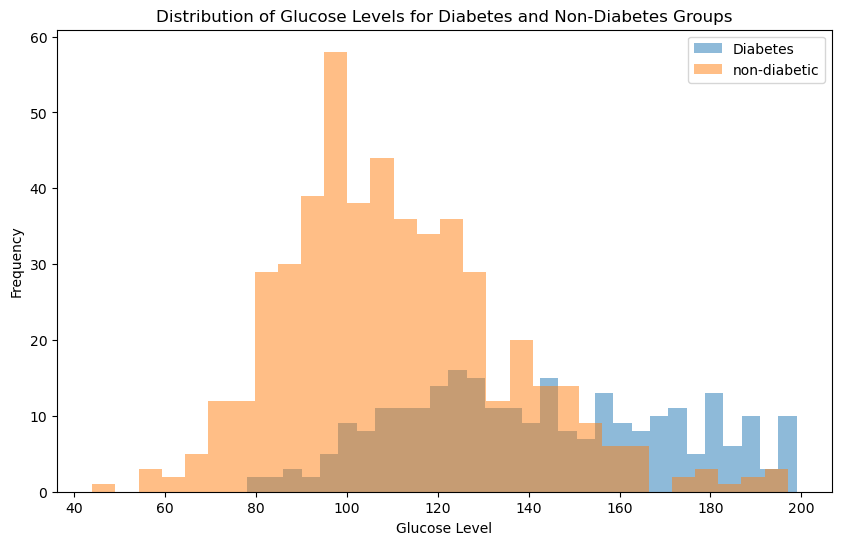

Reject null hypothesis: There is a significant difference in glucose levels.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats#provides the functions for statistical operations


# Separate the data into two groups based on 'Outcome'
diabetes_group = diabetes[diabetes['Outcome'] == 'yes']['Glucose']
non_diabetes_group = diabetes[diabetes['Outcome'] == 'no']['Glucose']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(diabetes_group, non_diabetes_group)

# Set your significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualize the distribution of glucose levels for both groups
plt.figure(figsize=(10, 6))
plt.hist(diabetes_group, bins=30, alpha=0.5, label='Diabetes' )
plt.hist(non_diabetes_group,bins=30,alpha=0.5,label='non-diabetic'  )
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Glucose Levels for Diabetes and Non-Diabetes Groups')
plt.show()

# Compare p-value to alpha
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in glucose levels.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in glucose levels.")


In [28]:
diabetes['Outcome'].value_counts()

no     500
yes    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Frequency')

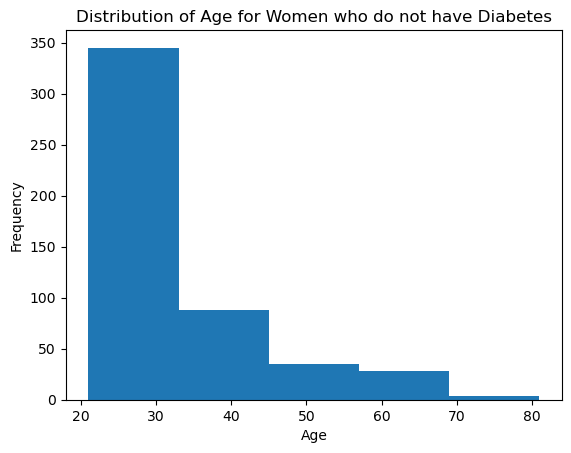

In [29]:
plt.hist(diabetes[diabetes['Outcome']=='no']['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Both graphs exhibit a similar trend: 
#a decrease in the number of individuals with diabetes as age increases. 
#However, it's important to note that this correlation with age may not be solely attributed to age itself.
#Given that the mean age of participants is approximately 33, there is a larger concentration of data in the age range of 20-40.

Text(0, 0.5, 'Frequency')

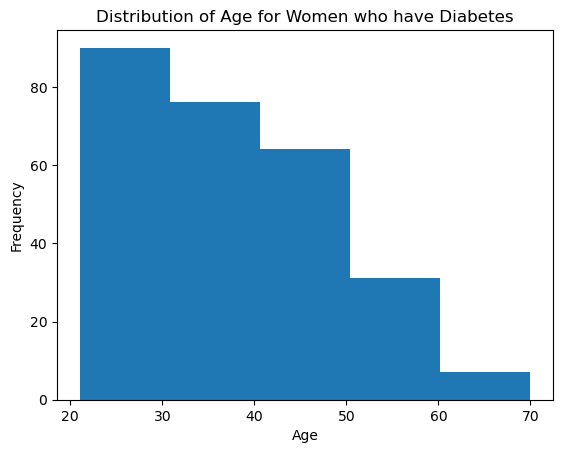

In [30]:
plt.hist(diabetes[diabetes['Outcome']=='yes']['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')